# Data collection and preprocessing for NREL datasets

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

import re

General script for downloading data, removing informationless features (no variation), renaming columns, and flagging the upgrade #

In [2]:
def regex_rename(df):
    def rename_col(col):
        col = re.sub(r'^out\.', '', col)
        col = re.sub(r'\.energy_consumption\.kwh', '', col)
        col = col.replace('.', '_')
        return col
    df = df.rename(columns={col: rename_col(col) for col in df.columns})
    return df

def load_data(fn):
    df = pd.read_csv(fn)
    df = df.drop(columns=['in.state', 'in.comstock_building_type', 'models_used', 'floor_area_represented'])
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df = regex_rename(df)
    return df

In [3]:
raw_folder = os.path.join("..", "data", "nrel", "raw")

fn0 = os.path.join(raw_folder, "up00-ny-largeoffice.csv")
fn1 = os.path.join(raw_folder, "up01-ny-largeoffice.csv")
fn2 = os.path.join(raw_folder, "up02-ny-largeoffice.csv")

df0 = load_data(fn0)
df1 = load_data(fn1)
df2 = load_data(fn2)

In [4]:
print(list(df0.columns))
print(list(df1.columns))
print(list(df2.columns))

['upgrade', 'timestamp', 'district_cooling_cooling', 'district_heating_heating', 'district_heating_water_systems', 'electricity_cooling', 'electricity_exterior_lighting', 'electricity_fans', 'electricity_heat_recovery', 'electricity_heat_rejection', 'electricity_heating', 'electricity_interior_equipment', 'electricity_interior_lighting', 'electricity_pumps', 'electricity_refrigeration', 'electricity_water_systems', 'natural_gas_heating', 'natural_gas_interior_equipment', 'natural_gas_water_systems', 'district_cooling_total', 'district_heating_total', 'electricity_total', 'natural_gas_total', 'district_heating_cooling', 'other_fuel_cooling', 'other_fuel_heating', 'other_fuel_total', 'other_fuel_water_systems', 'site_energy_total']
['upgrade', 'timestamp', 'district_cooling_cooling', 'district_heating_heating', 'district_heating_water_systems', 'electricity_cooling', 'electricity_exterior_lighting', 'electricity_fans', 'electricity_heat_recovery', 'electricity_heat_rejection', 'electrici

Upgrade=0 has no _savings features, but between upgrade=1 and upgrade=2, the columns seem to match up! so, we can apply load_data() to each upgrade=x dataset. the only reason i'm not doing it here is i worry the file size might add up (800MB?)

Script for handling missing data

In [5]:
def missing_data(df):
    return df.isnull().sum()

In [6]:
print(missing_data(df0).unique())
print(missing_data(df1).unique())
print(missing_data(df2).unique())

[0]
[0]
[0]


No missing data!

In [7]:
print(df0.dtypes.unique())
print(df1.dtypes.unique())
print(df2.dtypes.unique())



[dtype('int64') dtype('<M8[ns]') dtype('float64')]
[dtype('int64') dtype('<M8[ns]') dtype('float64')]
[dtype('int64') dtype('<M8[ns]') dtype('float64')]


index=int, datetime has nanosecond precision, rest of the features are all floats

Whilst normalisation is usually performed on a whole dataset, for multiple linear regression, we should do this after test train split to prevent information leakage. We can use StandardScaler later on to normalize datasets independently before modelling.



Note: have yet to convert timestamps into hours/days/whatever is needed

# Preliminary Data Visualizations:

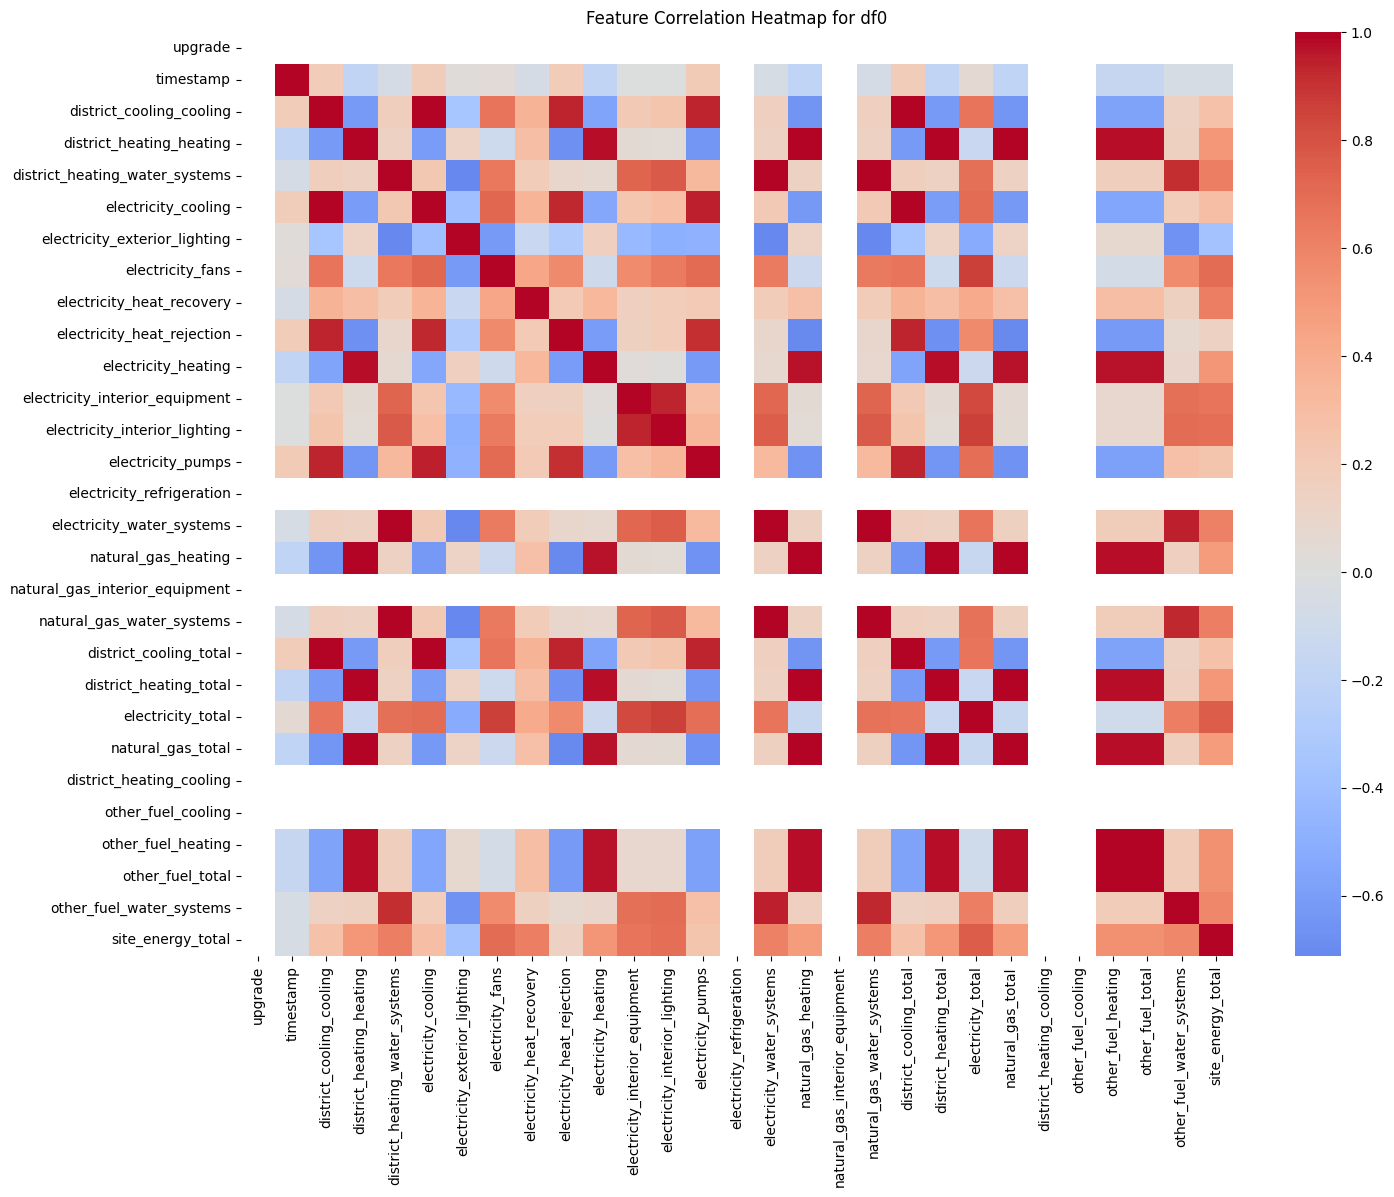

In [12]:
corr0 = df0.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr0, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap for df0')
plt.show()

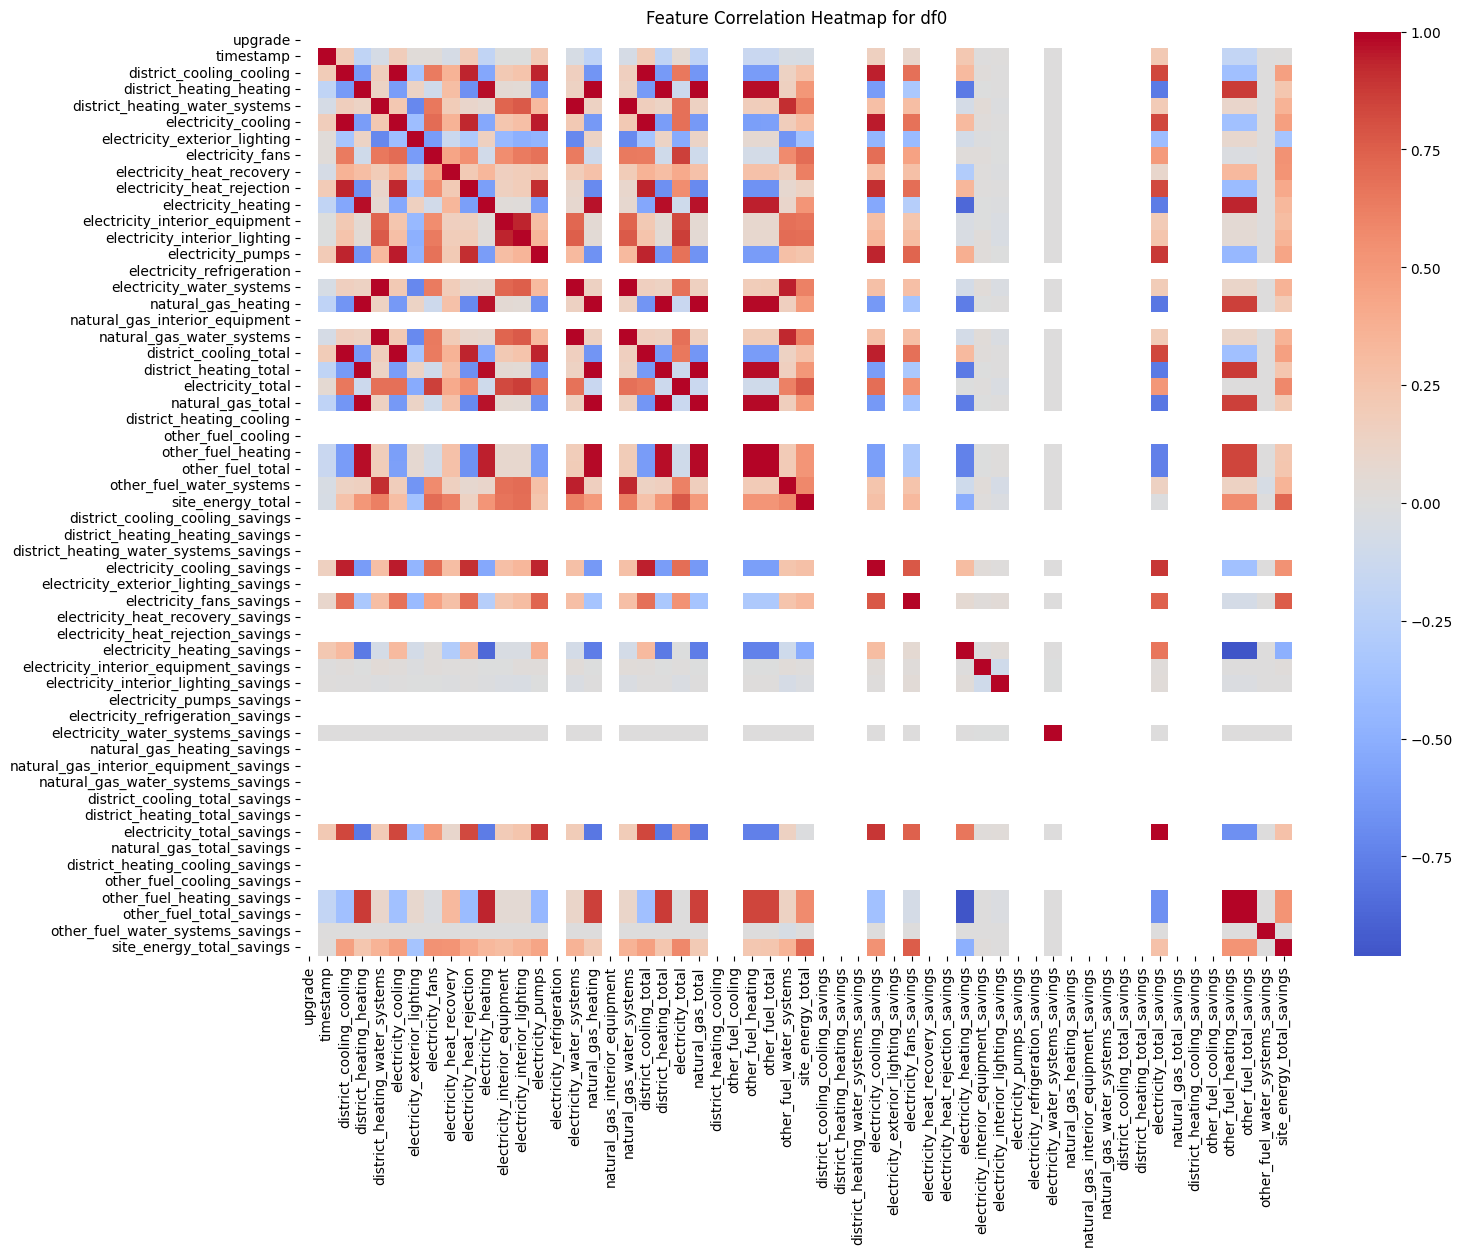

In [13]:
corr1 = df1.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr1, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap for df0')
plt.show()